<a href="https://colab.research.google.com/github/Magaton1010/Python_Analysis/blob/main/Ordinary_Least_Squares_(_OLS)_in_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [17]:
from google.colab import files
uploaded=files.upload()
file_name=list(uploaded.keys())[0]


Saving Treshold_yeild_Area_final _input.xlsx to Treshold_yeild_Area_final _input (3).xlsx


In [19]:
df = pd.read_excel(file_name)
df.head()

,Site,Treatment,Block,Row_Type,pixel_1,Area_1,pixel_2,Area_2,TY
0,LE,1,1,DR,391970.0,0.043192,468733.5,0.051651,144.12
1,LE,1,1,FN,459172.0,0.050597,448014.0,0.049368,132.55
2,LE,1,1,SN,408910.5,0.045059,453853.5,0.050011,126.92
3,LE,1,2,DR,392445.5,0.043245,534165.5,0.058861,144.84
4,LE,1,2,FN,466701.0,0.051427,483039.5,0.053227,133.98


Text(0.5, 1.0, 'Yield')

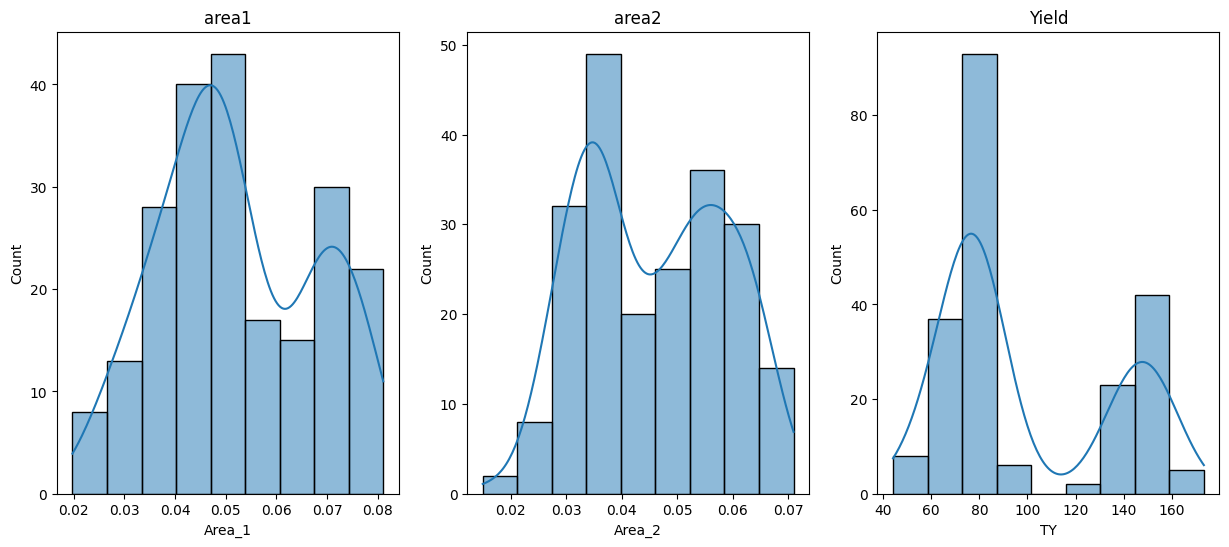

In [20]:
area1=df.Area_1
area2=df.Area_2
TY=df.TY
fig , axes =plt.subplots (1 ,3 ,figsize =(15,6))
sn.histplot(area1,kde=True ,ax=axes[0])
axes[0].set_title("area1")
sn.histplot(area2,kde=True ,ax=axes[1])
axes[1].set_title("area2")
sn.histplot(TY,kde=True ,ax=axes[2])
axes[2].set_title("Yield")

Text(0.5, 1.0, 'Yield')

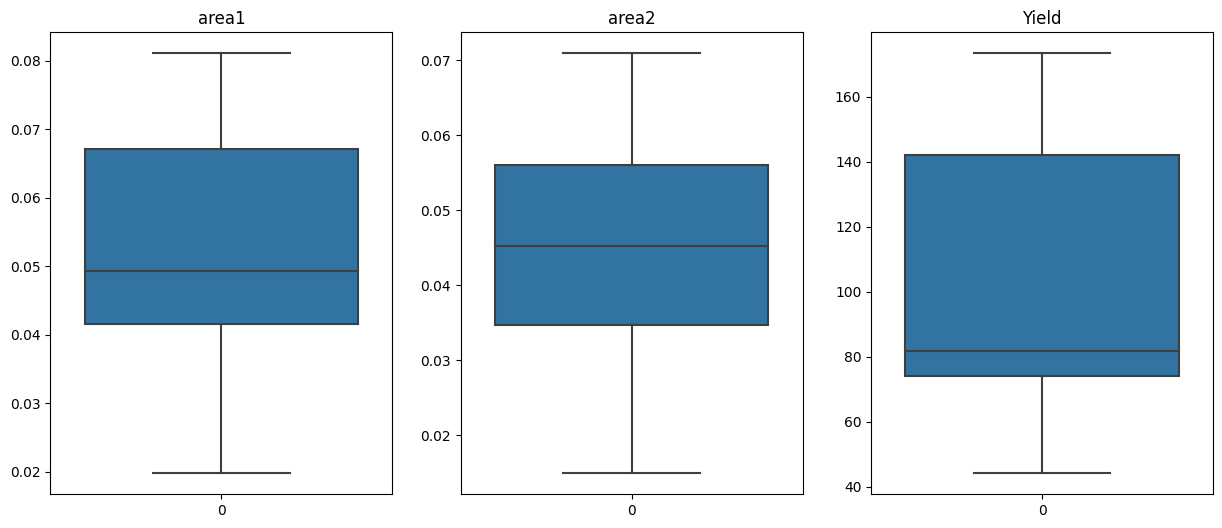

In [21]:
fig , axes =plt.subplots (1 ,3 ,figsize =(15,6))
sn.boxplot(area1,ax=axes[0])
axes[0].set_title("area1")
sn.boxplot(area2,ax=axes[1])
axes[1].set_title("area2")
sn.boxplot(TY,ax=axes[2])
axes[2].set_title("Yield")

In [22]:
cond_ll=df['Site']=='LL'
cond_LE=df['Site']=='LE'
cond_PI=df['Site']=='PI'
filter_LL_Area1=df.loc[cond_ll,['Area_1']]
filter_LL_Area2=df.loc[cond_ll,['Area_2']]
filter_LE_Area1=df.loc[cond_LE,['Area_1']]
filter_LE_Area2=df.loc[cond_LE,['Area_2']]
filter_PI_Area1=df.loc[cond_PI,['Area_1']]
filter_PI_Area1=df.loc[cond_PI,['Area_2']]
filter_LL_TY=df.loc[cond_ll,['TY']]
filter_LL_TY=df.loc[cond_ll,['TY']]
filter_LE_TY=df.loc[cond_LE,['TY']]
filter_LE_TY=df.loc[cond_LE,['TY']]
filter_PI_TY=df.loc[cond_PI,['TY']]
filter_PI_TY=df.loc[cond_PI,['TY']]

Text(0.5, 1.0, 'PI_Area2')

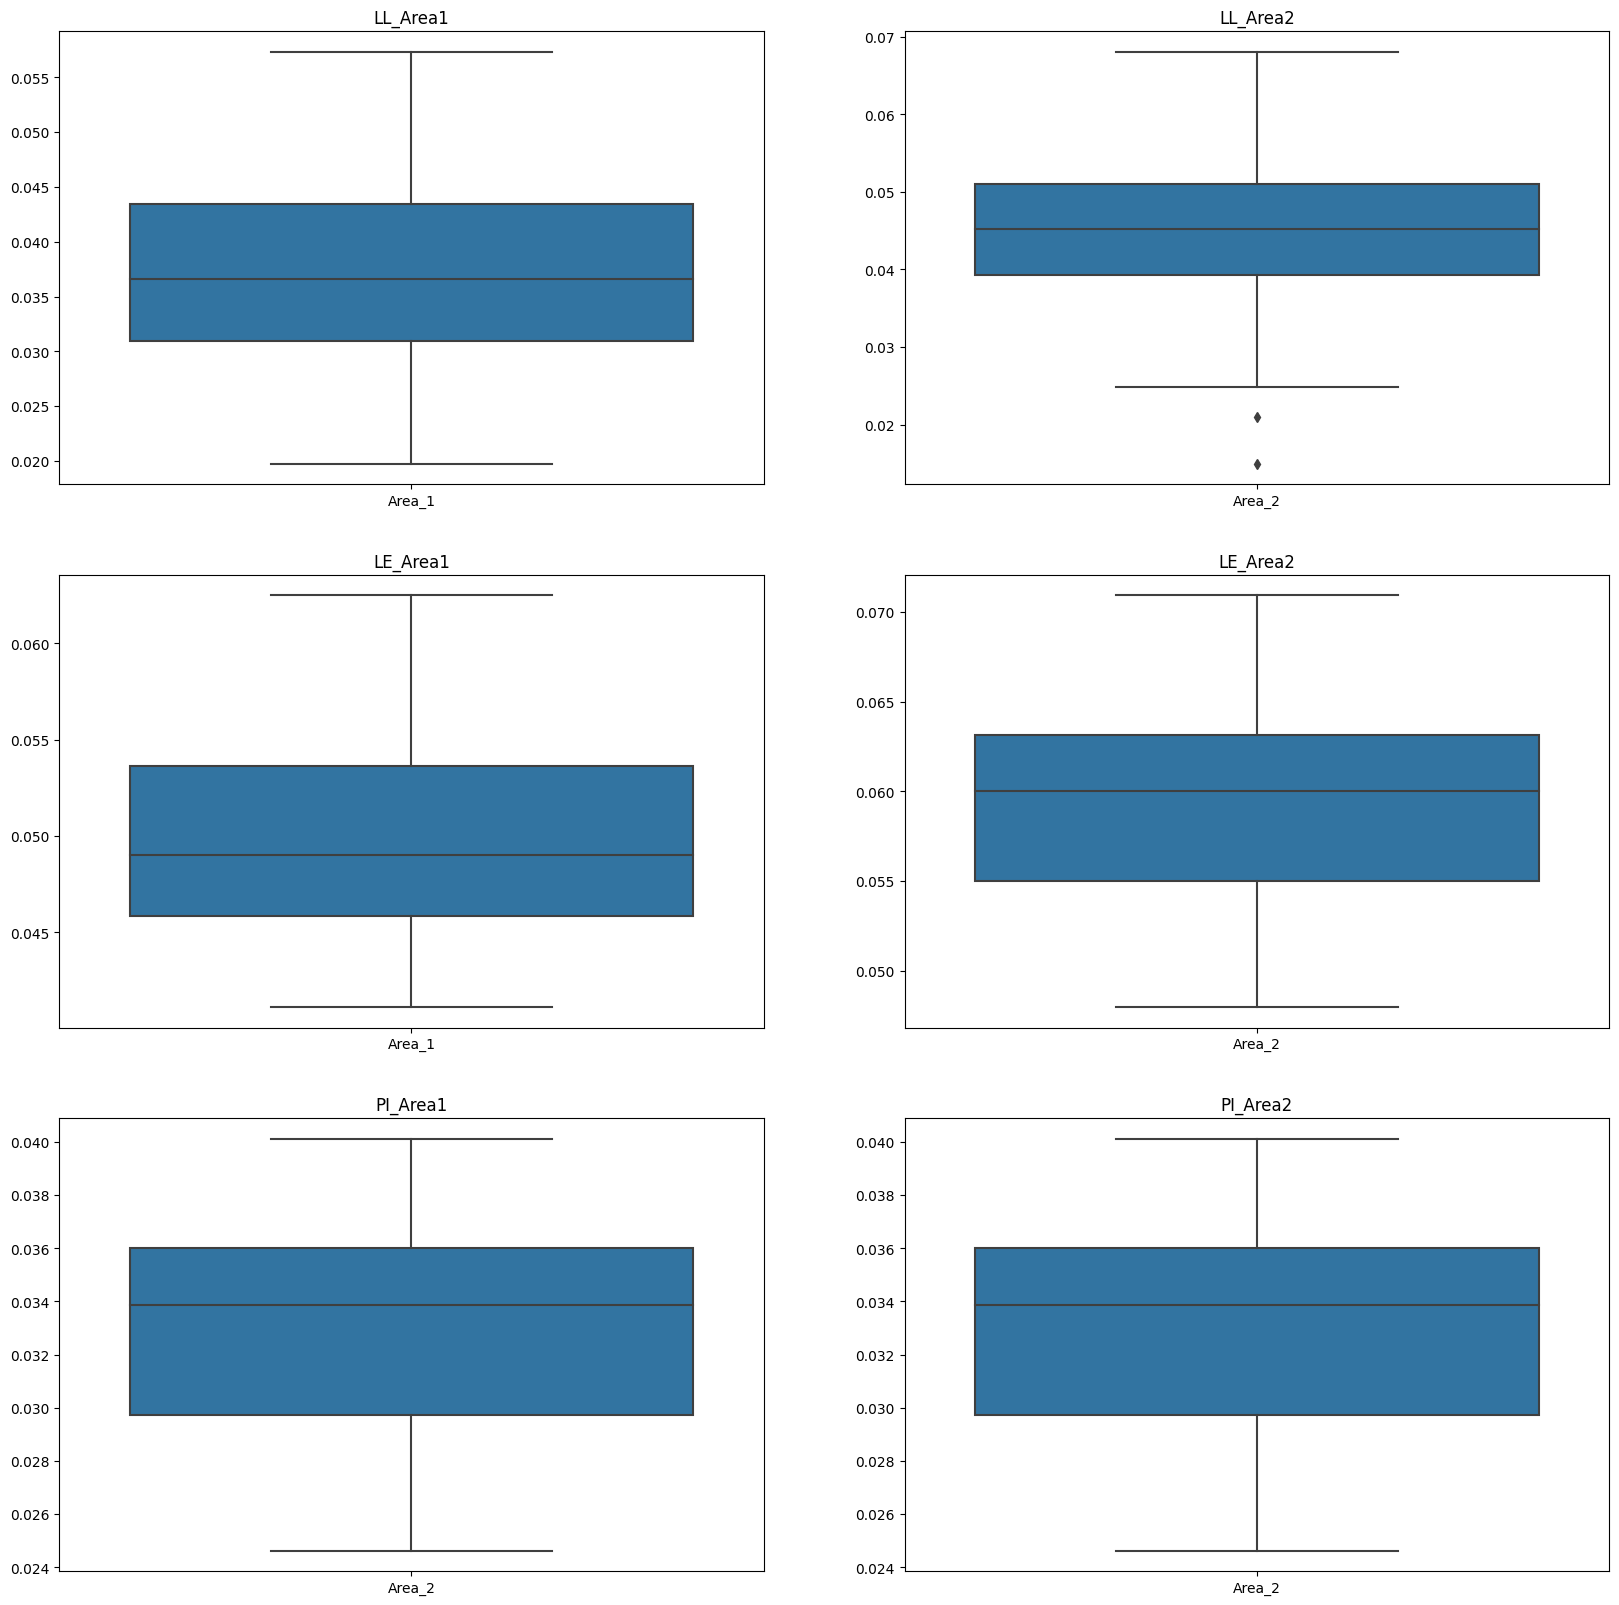

In [23]:
fig , axes =plt.subplots (3 ,2 ,figsize =(20,20))
sn.boxplot(filter_LL_Area1,ax=axes[0,0])
axes[0,0].set_title("LL_Area1")
sn.boxplot(filter_LL_Area2,ax=axes[0,1])
axes[0,1].set_title("LL_Area2")
sn.boxplot(filter_LE_Area1,ax=axes[1,0])
axes[1,0].set_title("LE_Area1")
sn.boxplot(filter_LE_Area2,ax=axes[1,1])
axes[1,1].set_title("LE_Area2")
sn.boxplot(filter_PI_Area1,ax=axes[2,0])
axes[2,0].set_title("PI_Area1")
sn.boxplot(filter_PI_Area1,ax=axes[2,1])
axes[2,1].set_title("PI_Area2")

**Ordinary Least Squares (OLS) in Linear Regression:**

OLS is a method for fitting a linear model to observed data by minimizing the sum of the squared differences between observed and predicted values. In the context of linear regression:

1. **Objective:** Minimize the sum of squared residuals (vertical distances between observed and predicted values).
   
2. **Model Representation:** The linear regression model is represented as: Y = β₀ + β₁*X₁ + β₂*X₂ + ... + βₙ*Xₙ + ε

   - Y is the dependent variable,
   - β₀ is the intercept,
   - β₁, β₂, ..., βₙ are the coefficients for independent variables X₁, X₂, ..., Xₙ,
   - ε is the error term.

3. **Fitting Process:**
   - The model is trained on a dataset using the training data.
   - Coefficients (β values) are estimated to minimize the sum of squared residuals.
   - The model can then make predictions on new or unseen data.

4. **Evaluation:**
   - Common metrics include R-squared, which measures the proportion of the variance in the dependent variable explained by the model.

5. **Assumptions:**
   - Linearity: The relationship between independent and dependent variables is linear.
   - Independence: Observations are independent of each other.
   - Homoscedasticity: Residuals have constant variance.
   - Normality: Residuals are normally distributed.

**Implementation using statsmodels in Python:**

--------------------------
**PolynomialFeatures in Polynomial Regression:**

The `PolynomialFeatures` class is part of scikit-learn and is used in polynomial regression to create polynomial features from the original features. In particular, when `degree=2`, it generates a new feature matrix consisting of all polynomial combinations of the input features up to the second degree.

**Key Points:**

1. **Objective:** Enhance the model's capacity to capture non-linear relationships by introducing polynomial features.
   
2. **Usage:**
   - Create an instance of `PolynomialFeatures` with the desired degree.
   - Transform the original feature matrix to include polynomial features.

3. **Example:**
   - For a single feature X, the transformation includes X, X², for multiple features, it includes combinations like X₁, X₂, X₁², X₂², X₁*X₂, etc.

4. **Implementation using scikit-learn in Python:**

**Code Explanation**:

**Data Preparation**:

Categorical columns (Site, Treatment, Block, Row_Type) are converted to categorical data types.
Predictor variables (X) and the target variable (y) are selected.
Dummy Variable Creation:

pd.get_dummies() is used to create dummy variables for categorical columns, dropping the first category to prevent multicollinearity.
Train-Test Split:

train_test_split is employed to split the data into training and testing sets with a 30-70 ratio.
Polynomial Features:

*** poly = PolynomialFeatures(degree=2) is employed to generate second-degree polynomial features from the original predictors. Therefore, in this case, the code performs a second-degree polynomial regression by utilizing quadratic terms (degree=2), allowing the model to capture potentially curved relationships between the predictors and the target variable.
PolynomialFeatures(degree=2) is used to transform the independent variables into second-degree polynomial features (degree=2).
OLS Model Fitting:

**OLS regression is employed to estimate the coefficients (weights) of the predictors to minimize the sum of squared differences between the predicted and actual values. This method is beneficial for understanding the linear relationship between the predictors and the target variable, even after introducing polynomial features.sm.OLS(y_train, X_train_poly).fit() fits an OLS regression model using statsmodels on the transformed polynomial features.
Prediction and Evaluation:

Predictions are made on the test set using the trained model.
R-squared (r2_score) is calculated to assess the model's goodness of fit on the test data.
Printing Results:

The R-squared score on the test data is printed.
Optionally, the summary of the fitted OLS model (model.summary()) can be printed for detailed analysis.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Convert categorical variables to categorical data type
df['Site'] = df['Site'].astype('category')
df['Treatment'] = df['Treatment'].astype('category')
df['Block'] = df['Block'].astype('category')
df['Row_Type'] = df['Row_Type'].astype('category')

# Selecting predictors (independent variables) and the target variable
X = df[['Site', 'Treatment', 'Block', 'Row_Type', 'Area_1', 'Area_2']]
y = df['TY']

# Creating dummy variables for categorical columns
X = pd.get_dummies(X, drop_first=False)

# Splitting the df into training and testing sets (30train, 70% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Adding a constant to the independent variables matrix for regression intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fitting a quadratic polynomial regression (degree=1) on the training data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = sm.OLS(y_train, X_train_poly).fit()

# Predictions using the model for plotting on test data
pred_test = model.predict(X_test_poly)


# Calculate R-squared on the test set
r2 = r2_score(y_test, pred_test)
print(f"R-squared score on test data: {r2:.4f}")
# Get summary of the model (optional)
model.summary()


R-squared score on test data: 0.9307


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TY   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     59.05
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           9.68e-38
Time:                        14:48:30   Log-Likelihood:                -410.04
No. Observations:                 151   AIC:                             1006.
Df Residuals:                      58   BIC:                             1287.
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5022     10.215      1.322      0.191      -6.945      33.949
x1            13.5022     10.215      1.322      0.191      -6.945      33.949
x2          -220.3715    542.205     -0.406      0.686   -1305.713     864.970
x3           526.8952    663.379      0.794      0.430    -801.002    1854.793
x4            13.2097     11.210      1.178      0.243      -9.230      35.650
x5            -6.7759      5.062     -1.339      0.186     -16.908       3.356
x6             7.0684      9.376      0.754      0.454     -11.701      25.837
x7            -2.3571      5.795     -0.407      0.686     -13.957       9.243
x8             5.2278      6.140      0.851      0.398      -7.063      17.519
x9            20.9501      6.962      3.009      0.004       7.013      34.887
x10           -4.1165      7.664     -0.537      0.593     -19.457      11.224
x11           -0.3363      4.865     -0.069      0.945     -10.074       9.401
x12           -5.8659      7.209     -0.814      0.419     -20.297       8.565
x13            0.3480      6.625      0.053      0.958     -12.913      13.609
x14            6.1961      4.538      1.365      0.177      -2.888      15.280
x15            7.6826      5.657      1.358      0.180      -3.642      19.007
x16           -0.7245      4.439     -0.163      0.871      -9.610       8.161
x17            2.7511      3.078      0.894      0.375      -3.411       8.913
x18            6.6133      6.041      1.095      0.278      -5.478      18.705
x19            4.1377      5.100      0.811      0.421      -6.072      14.347
x20           13.5022     10.215      1.322      0.191      -6.945      33.949
x21         -220.3715    542.205     -0.406      0.686   -1305.713     864.970
x22          526.8952    663.379      0.794      0.430    -801.002    1854.793
x23           13.2097     11.210      1.178      0.243      -9.230      35.650
x24           -6.7759      5.062     -1.339      0.186     -16.908       3.356
x25            7.0684      9.376      0.754      0.454     -11.701      25.837
x26           -2.3571      5.795     -0.407      0.686     -13.957       9.243
x27            5.2278      6.140      0.851      0.398      -7.063      17.519
x28           20.9501      6.962      3.009      0.004       7.013      34.887
x29           -4.1165      7.664     -0.537      0.593     -19.457      11.224
x30           -0.3363      4.865     -0.069      0.945     -10.074       9.401
x31           -5.8659      7.209     -0.814      0.419     -20.297       8.565
x32            0.3480      6.625      0.053      0.958     -12.913      13.609
x33            6.1961      4.538      1.365      0.177      -2.888      15.280
x34            7.6826      5.657      1.358      0.180      -3.642      19.007
x35           -0.7245      4.439     -0.163      0.871      -9.610       8.161
x3

**Residual Plot**
The residual plot helps in examining the distribution of residuals to check for patterns or heteroscedasticity (non-constant variance). A random scatter of residuals around zero indicates a good fit.
This plot helps to examine the distribution of residuals and assess whether the assumptions of the linear regression model hold true.

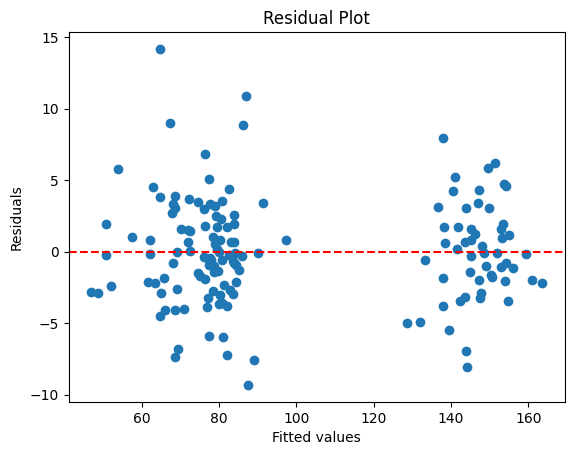

In [25]:
import matplotlib.pyplot as plt

# Get residuals from the fitted model
residuals = model.resid

# Create a residual plot
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

#Partial Regression Plots (for each predictor variable)
Partial regression plots show the relationship between a specific independent variable and the target variable while holding other variables constant.This code generates partial regression plots for 'Area_1' and 'Area_2'. which could be modified  for other variables as needed.

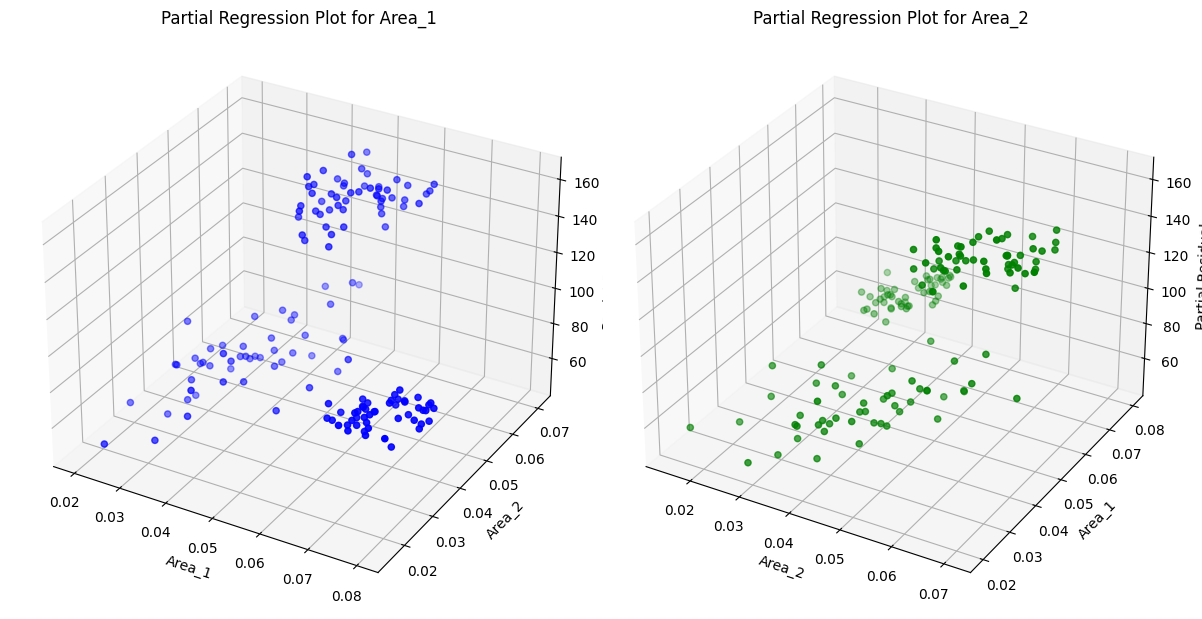

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 10))

# Partial regression plot for Area_1
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X['Area_1'], X['Area_2'], y - model.resid, c='blue')
ax1.set_xlabel('Area_1')
ax1.set_ylabel('Area_2')
ax1.set_zlabel('Partial Residuals')
ax1.set_title('Partial Regression Plot for Area_1')

# Partial regression plot for Area_2
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X['Area_2'], X['Area_1'], y - model.resid, c='green')
ax2.set_xlabel('Area_2')
ax2.set_ylabel('Area_1')
ax2.set_zlabel('Partial Residuals')
ax2.set_title('Partial Regression Plot for Area_2')

plt.tight_layout()
plt.show()

#Predicted vs. Actual Plot
This plot compares the predicted values from the model against the actual target values, indicating how well the model predictions align with the actual data.

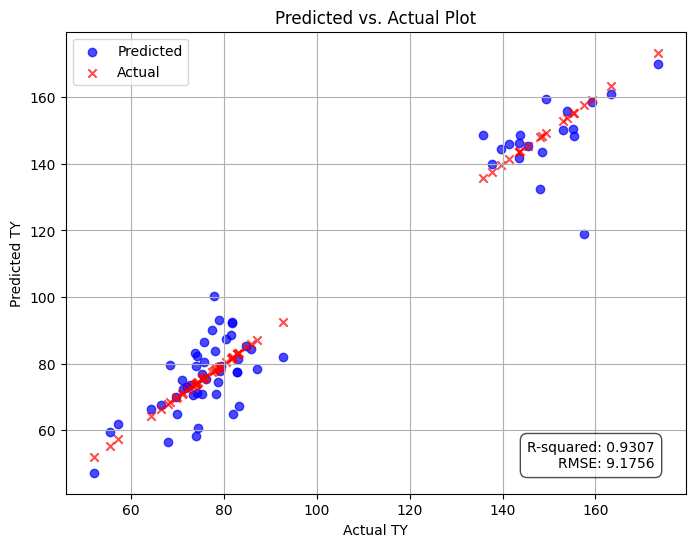

In [27]:
from sklearn.metrics import r2_score, mean_squared_error

# Other evaluation metrics
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)

# Calculate R-squared on the test set
r2 = r2_score(y_test, pred_test)

plt.figure(figsize=(8, 6))  # Set the figure size

plt.scatter(y_test, pred_test, label='Predicted', marker='o', color='blue', alpha=0.7)  # Predicted values in blue
plt.scatter(y_test, y_test, label='Actual', marker='x', color='red', alpha=0.7)  # Actual values in red (on top of predicted values)

plt.title('Predicted vs. Actual Plot')
plt.xlabel('Actual TY')
plt.ylabel('Predicted TY')
plt.legend()
plt.grid(True)

# Annotate with evaluation metrics in the right-bottom corner
eval_metrics = f"R-squared: {r2:.4f}\nRMSE: {rmse:.4f}"
plt.annotate(eval_metrics, xy=(0.95, 0.05), xycoords='axes fraction', ha='right', va='bottom', fontsize=10, bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))

plt.show()

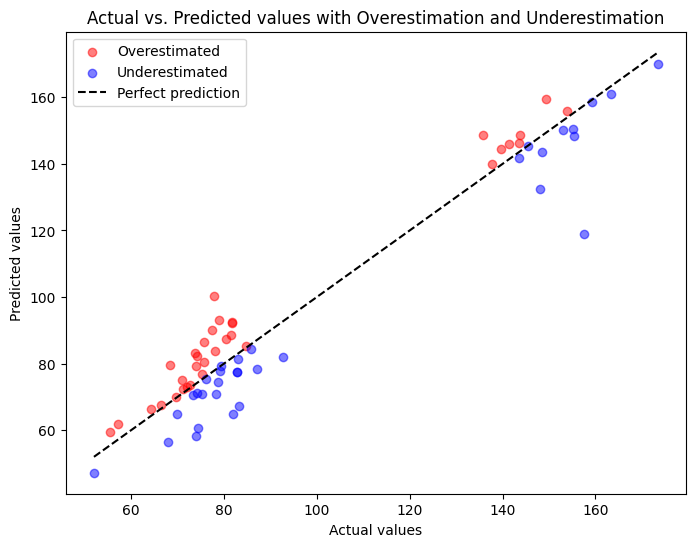

R-squared: 0.9307
Mean Squared Error (MSE): 84.1914
Mean Absolute Error (MAE): 6.5934


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming 'y_test' contains the actual target values and 'pred_test' contains the predicted values

# Calculate the differences between predicted and actual values
differences = pred_test - y_test

# Scatter plot with different colors for overestimated and underestimated points
plt.figure(figsize=(8, 6))

# Plot points where the predicted values are higher than actual values (overestimation)
plt.scatter(y_test[differences > 0], pred_test[differences > 0], color='red', alpha=0.5, label='Overestimated')

# Plot points where the predicted values are lower than actual values (underestimation)
plt.scatter(y_test[differences < 0], pred_test[differences < 0], color='blue', alpha=0.5, label='Underestimated')

# Plot the diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Perfect prediction')

# Labeling and styling the plot
plt.title('Actual vs. Predicted values with Overestimation and Underestimation')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

# Assuming 'y_test' contains the actual target values and 'pred_test' contains the predicted values

# Calculate R-squared
r2 = r2_score(y_test, pred_test)
print(f"R-squared: {r2:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred_test)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_test)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

**R-squared (R²):**

R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the model.In our case, an R-squared value of 0.5342 means that approximately 53.4% of the variance in the target variable is explained by polynomial regression model.

**Mean Squared Error (MSE):**

MSE is a measure of the average squared differences between the actual values and the predicted values.
It quantifies the average of the squares of the errors or deviations.
In our case, an MSE of 599.5069 implies that, on average, the squared difference between the predicted values and the actual values (y_test) is approximately 599.5069.

**Mean Absolute Error (MAE):**

MAE is a measure of the average absolute differences between the actual values and the predicted values.
It quantifies the average of the absolute errors or deviations.
In our case, an MAE of 19.0891 implies that, on average, the absolute difference between the predicted values and the actual values (y_test) is approximately 19.0891